In [ ]:
# This is my python "cheat sheet" 

In [1]:
1

1

In [4]:
2 + 3 

5

In [5]:
5 / 2

2

In [6]:
# Floating point numbers
5. / 3. 

1.6666666666666667

In [7]:
3 * 4. 

12.0

In [9]:
# Exponents
3**2.

9.0

In [11]:
# Defining variables
a = 5
b = 6
print a + b

11


In [12]:
a * b

30

In [13]:
print(a)

5


In [11]:
import math
math.sqrt(16.)

4.0

In [16]:
math.pi

3.141592653589793

In [12]:
import numpy as np

In [19]:
a = "hello "
b = "ciao"
print(a + b)

hello ciao


In [21]:
a = np.array([3,4,5,6,7])

In [22]:
a

array([3, 4, 5, 6, 7])

In [23]:
a + 5

array([ 8,  9, 10, 11, 12])

In [24]:
np.mean(a)

5.0

In [25]:
np.std(a)

1.4142135623730951

In [26]:
a * a

array([ 9, 16, 25, 36, 49])

In [27]:
b = np.array([4,5,6,7,8])
a + b 

array([ 7,  9, 11, 13, 15])

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

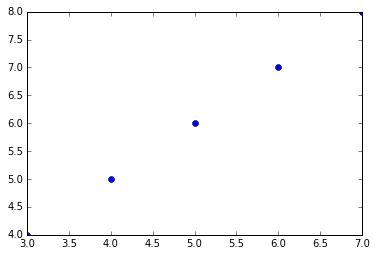

In [29]:
plt.plot(a,b,'bo')

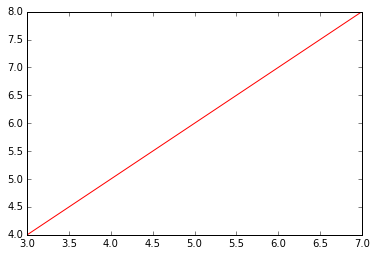

In [32]:
plt.plot(a,b,'r-')

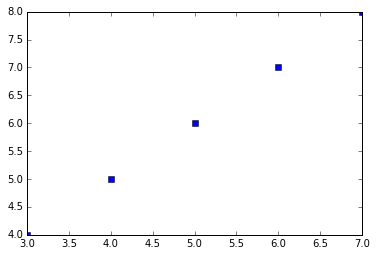

In [33]:
plt.plot(a,b,'sb') 

(0, 10)

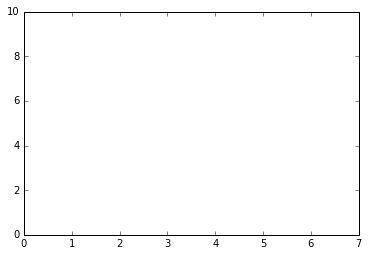

In [34]:
plt.xlim(0,7)
plt.ylim(0,10)

In [35]:
help(plt.errorbar)

Help on function errorbar in module matplotlib.pyplot:

errorbar(x, y, yerr=None, xerr=None, fmt=u'', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, hold=None, data=None, **kwargs)
    Plot an errorbar graph.
    
    Call signature::
    
      errorbar(x, y, yerr=None, xerr=None,
               fmt='', ecolor=None, elinewidth=None, capsize=None,
               barsabove=False, lolims=False, uplims=False,
               xlolims=False, xuplims=False, errorevery=1,
               capthick=None)
    
    Plot *x* versus *y* with error deltas in *yerr* and *xerr*.
    Vertical errorbars are plotted if *yerr* is not *None*.
    Horizontal errorbars are plotted if *xerr* is not *None*.
    
    *x*, *y*, *xerr*, and *yerr* can all be scalars, which plots a
    single error bar at *x*, *y*.
    
    Optional keyword arguments:
    
      *xerr*/*yerr*: [ scalar | N, Nx1, or 2xN array-like ]
 

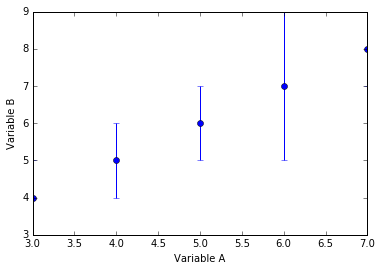

In [38]:
aerr = np.array([1,1,1,2,1])
plt.errorbar(a,b,yerr = aerr, fmt='bo')
plt.xlabel('Variable A')
plt.ylabel('Variable B')

In [2]:
# import library to read files
from astropy.io import ascii

In [16]:
infile = 'planet2radialdata.txt'
hdat1 = ascii.read(infile, names = ['HJD', 'RV', 'RV_err'])

In [6]:
infile = 'hubble_data_riess2016.txt'
hdat1 = ascii.read(infile, names = ['galaxy', 'supernova', 'm', 'm_err', 'DM', 'DM_err', 'M', 'M_err', 'v'])

In [17]:
hdat1

HJD,RV,RV_err
float64,float64,float64
86.99525,229.0,10.8
87.11354,82.1,8.5
87.9633,167.5,8.4
88.04216,286.3,9.7
88.96503,-336.5,8.6
89.04672,-234.5,10.9
89.09622,-183.9,9.3


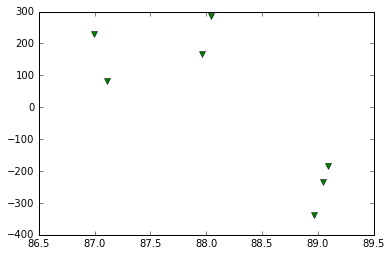

In [18]:
plt.plot(hdat1['HJD'], hdat1['RV'], 'gv')

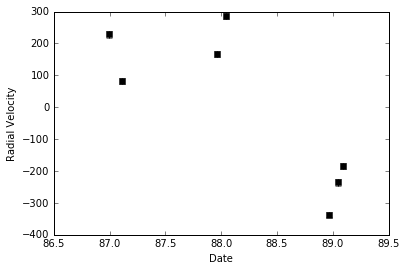

In [22]:
plt.errorbar(hdat1['HJD'], hdat1['RV'], yerr=hdat1['RV_err'], fmt='ks')
plt.xlabel('Date')
plt.ylabel('Radial Velocity')
#plt.xlim(0, 1)
plt.plot

In [54]:
# Find the distance from distance modulus
# Write the distance in Mpc 
dist = 10.**((hdat1['DM']/5)+1)
dist = dist/1.e6
print dist

      DM     
-------------
6.71428852926
31.5791182863
31.9595017481
18.2557634619
18.2894228128
20.0539533343
31.5936643568
25.9656979027
24.0768684561
20.7682546378
22.2535857805
18.1134009262
16.4437172321
15.1774915586
20.2488330653
22.7614539314
28.3530641176
19.9434367426
38.3530582457


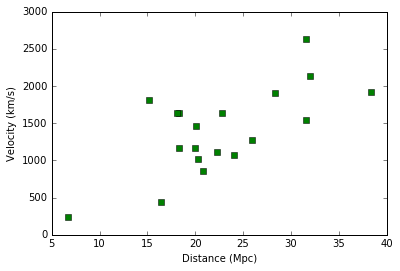

In [56]:
plt.plot(dist, hdat1['v'], 'gs')
plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")

In [57]:
help(np.polyfit)

Help on function polyfit in module numpy.lib.polynomial:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting polynomial
    rcond : float, optional
        Relative condition number of the fit. Singular values smaller than
        this relative to the largest singular value will be ignored. The
        default value is len(x)*eps, where eps is the

In [58]:
result = np.polyfit(dist, hdat1['v'], 1)

In [59]:
# First term is the slope (m), second term is the intercept (b) (mx + b)
print result

[  53.6296996   186.40616205]


In [62]:
v_model = np.polyval(result, dist)
print v_model

[  546.49143891  1879.98478943  1900.38464023  1165.45727251  1167.26241339
  1261.8936552   1880.76489083  1578.93874052  1477.6413847   1300.20141953
  1379.85928252  1157.82241249  1068.27777755  1000.37047505  1272.34499663
  1407.09609889  1706.97247347  1255.96668358  2243.26915457]


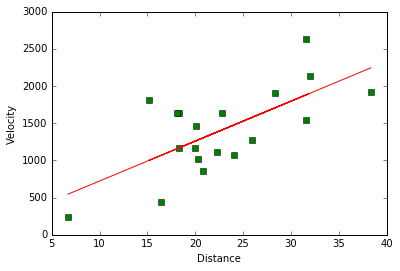

In [64]:
plt.plot(dist, hdat1['v'], 'gs')
plt.plot(dist, v_model, 'r-')
plt.xlabel("Distance")
plt.ylabel("Velocity")
plt.savefig('Hubble_plot.eps')

In [72]:
result2 = np.polyfit(dist, hdat1['v'], 2)

In [74]:
xx = np.arange(5, 40, 1)

In [82]:
v_model2 = np.polyval(result2, xx)

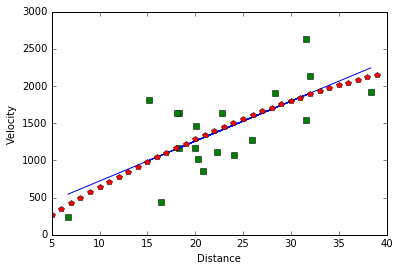

In [83]:
plt.plot(dist, hdat1['v'], 'gs')
plt.plot(dist, v_model, 'b-')
plt.plot(xx, v_model2, 'rp')
plt.xlabel('Distance')
plt.ylabel('Velocity')


(array([ 12.,  14.,  10.,   5.,  15.,   7.,  13.,   8.,   7.,   9.]),
 array([ 0.02028722,  0.11771656,  0.21514589,  0.31257522,  0.41000456,
         0.50743389,  0.60486323,  0.70229256,  0.79972189,  0.89715123,
         0.99458056]),
 <a list of 10 Patch objects>)

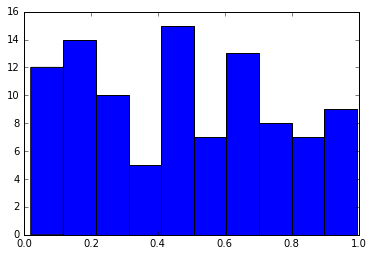

In [88]:
#Make a random generator with numbers between 1 and 23
yy = np.random.random(100)
plt.hist(yy)

In [85]:
np.random.randint(1, 23)

22

(array([ 11.,  11.,  11.,   9.,  14.,   6.,   8.,  13.,  10.,   7.]),
 array([  9.67325853e-03,   2.29885580e+00,   4.58803834e+00,
          6.87722089e+00,   9.16640343e+00,   1.14555860e+01,
          1.37447685e+01,   1.60339511e+01,   1.83231336e+01,
          2.06123161e+01,   2.29014987e+01]),
 <a list of 10 Patch objects>)

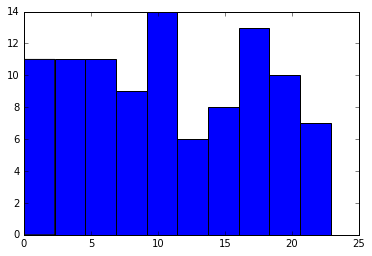

In [94]:
zz = np.random.random(100)*23
plt.hist(zz)

(array([ 1.,  0.,  0.,  2.,  0.,  0.,  5.,  0.,  0.,  2.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

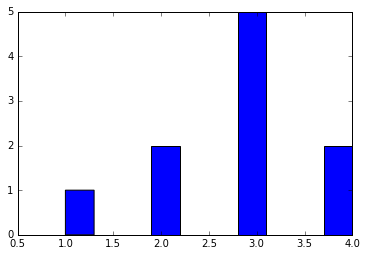

In [95]:
ww = np.array([1,2,3,4,3,4,3,3,3,2])
plt.hist(ww)